In [2]:
#importing all the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score,confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier as rfc
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
import time


In [3]:
#Importing Dataset
df = pd.read_csv('creditcard.csv')
df.head()


,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


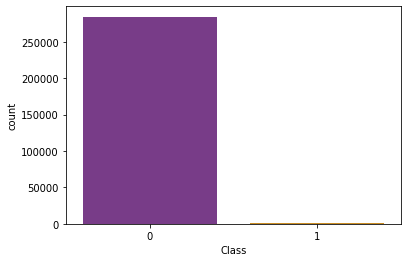

In [4]:
#Checking the class Distribution
sns.countplot(x='Class', data=df, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))

In [5]:
#Scaling 'Time' and 'Amount' Features
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# <p style="color:blue"> Logistic Regression
 

/Users/qalabeabbas/opt/anaconda3/envs/QQ/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     56861
       Fraud       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Runtime of LR on unsampled data is 3.481494188308716


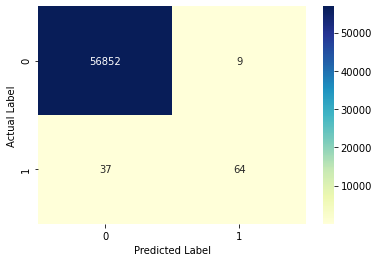

In [6]:
#Train test split

x = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

#Logistis Regression on Original data

st = time.time()
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=labels))

et = time.time()
print(f"Runtime of LR on unsampled data is {et - st}")


# <p style="color:blue"> Random Forest Classifier

<ipython-input-7-edcfcb8d6189>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_f.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Runtime of RFC on Unsampled Data 1318.5466969013214


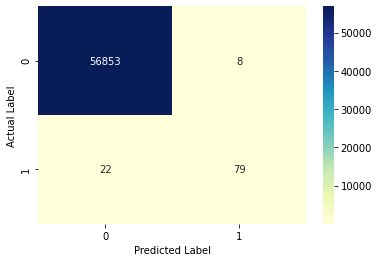

In [7]:
#RFC on Unsampled Data

st = time.time()
rand_f = rfc(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rand_f.fit(x_train, y_train)
y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

et = time.time()
print(f"Runtime of RFC on Unsampled Data {et - st}")





# <p style="color:blue"> XGBoost 

/Users/qalabeabbas/opt/anaconda3/envs/QQ/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.81      0.86       101

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Runtime of XGBoost on Unsampled Data is 68.2778959274292


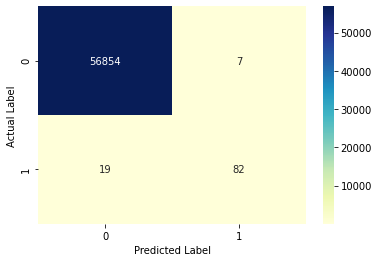

In [8]:
#XGBoost on Unsampled Data
st = time.time()

xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(x_train, y_train)
y_pred = xgbmodel.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

et = time.time()
print(f"Runtime of XGBoost on Unsampled Data is {et - st}")




# <p style="color:blue"> Neural Network

Epoch 1/15
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 2/15
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 3/15
15190/15190 [==============================] - 23s 2ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 4/15
15190/15190 [==============================] - 31s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 5/15
15190/15190 [==============================] - 29s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 6/15
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 7/15
15190/15190 [==============================] - 23s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 8/15
15190/15190 [==============================] - 24s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 9/15
15190/15190 [==============================] - 23s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 10/15
15190/15190 [==============================

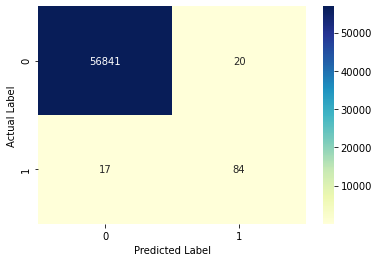

In [9]:
#Neural Network Model

nnmodel = Sequential([Dense(input_dim=30, units=16, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dropout(0.5),
                   Dense(units=20, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dense(units=1, activation='sigmoid')])
st = time.time()

nnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nnmodel.fit(x_train, y_train, batch_size=15, epochs=15)
et = time.time()

print(f"Runtime of ANN on Unsampeld data is {et - st}")

score = nnmodel.evaluate(x_test, y_test)
print(score)

y_pred = nnmodel.predict_classes(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))


